# web scrapping to extract reviews of my laptop from amazon website 

In [1]:
import requests
from bs4 import BeautifulSoup


In [2]:
amazon_url = 'https://www.amazon.in/Redmi-Note-Pro-Interstellar-Snapdragon/product-reviews/B08696XB3V/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1'

In [3]:
# writing a function for requesting amazon for the data and parsing the data using Beautiful soup

In [4]:
 header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/'}
review_page = requests.get(url = amazon_url ,headers=header)
soup = BeautifulSoup(review_page.text , 'html.parser')

In [5]:
def get_soup(amazon_url):
    header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/'}
    review_page = requests.get(url = amazon_url ,headers=header)
    soup = BeautifulSoup(review_page.text , 'html.parser')
    return soup

In [6]:
review_list = []

In [7]:
def get_reviews(soup):
    reviews = soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review = {'comment': item.find('span',{'data-hook':'review-body'}).text.strip()}
            review_list.append(review)
    except:
        pass


In [8]:
for x in range(1,10):
    a = get_soup(f'https://www.amazon.in/Redmi-Note-Pro-Interstellar-Snapdragon/product-reviews/B08696XB3V/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page {x}')
    get_reviews(a)
    print(len(review_list))
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break
    

Getting page 1
10
Getting page 2
20
Getting page 3
30
Getting page 4
40
Getting page 5
50
Getting page 6
60
Getting page 7
70
Getting page 8
80
Getting page 9
90


In [9]:
import pandas as pd
mi = pd.DataFrame(review_list)

In [10]:
mi.to_csv('mi.csv')

In [11]:
mi.isna().sum()

comment    0
dtype: int64

# textmining

In [12]:
import numpy as np
import pandas as pd
import string 
import spacy 
import re 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [13]:
mi.comment = mi.comment.apply(lambda x:re.sub('[^a-zA-Z]',' ',x))
mi

,comment
0,Got the Note Pro in Galcier White Colour on ...
1,Redmi is famous for its budget smartphones Th...
2,Over all at this price amazing phone
3,I am using this model for almost years and...
4,Hello guys I am using this phone since one mon...
...,...
85,Not Bad
86,It s amazing product
87,Very good product
88,Its usage is very good It includes all the bu...


In [14]:
mi_copy = mi.copy()

In [15]:
mi = [comment.strip() for comment in mi.comment] # remove both the leading and the trailing characters
mi = [comment for comment in mi if comment] # removes empty strings, because they are considered in Python as False
mi[0:10] 

['Got the Note   Pro in Galcier White Colour on first sale itself  I skipped Note   Pro  Swift Delivery with Amazon  After spending a few weeks with it  here s my experience  I keep switching phones often and let s see if Note   Pro is the ideal phone Design Awesome design  I like the center placed punch hole camera  it gives a overall sense of symmetry  The Aura Balanced Design is premium  Glass Front   Back With Curved Edges  Plastic Frame  Phone comes with a silicon back cover in the box and a plastic screen guard pre applied on the screen  Looks really nice with the white colour but due to      aspect ratio and large screen  it is a tall phone  quite difficult to handle single handedly even with my big enough hands  Also I now need to buy jeans with bigger pockets because in my wardrobe I couldn t find a jeans that could accommodate this phone comfortably  Although It is a nice premium looking design but not practical due to being tall which hinders one handed usage  Also the camer

In [17]:
# Joining the list into one string/text
text = ' '.join(mi)
text 

'Got the Note   Pro in Galcier White Colour on first sale itself  I skipped Note   Pro  Swift Delivery with Amazon  After spending a few weeks with it  here s my experience  I keep switching phones often and let s see if Note   Pro is the ideal phone Design Awesome design  I like the center placed punch hole camera  it gives a overall sense of symmetry  The Aura Balanced Design is premium  Glass Front   Back With Curved Edges  Plastic Frame  Phone comes with a silicon back cover in the box and a plastic screen guard pre applied on the screen  Looks really nice with the white colour but due to      aspect ratio and large screen  it is a tall phone  quite difficult to handle single handedly even with my big enough hands  Also I now need to buy jeans with bigger pockets because in my wardrobe I couldn t find a jeans that could accommodate this phone comfortably  Although It is a nice premium looking design but not practical due to being tall which hinders one handed usage  Also the camera

In [18]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'Got the Note   Pro in Galcier White Colour on first sale itself  I skipped Note   Pro  Swift Delivery with Amazon  After spending a few weeks with it  here s my experience  I keep switching phones often and let s see if Note   Pro is the ideal phone Design Awesome design  I like the center placed punch hole camera  it gives a overall sense of symmetry  The Aura Balanced Design is premium  Glass Front   Back With Curved Edges  Plastic Frame  Phone comes with a silicon back cover in the box and a plastic screen guard pre applied on the screen  Looks really nice with the white colour but due to      aspect ratio and large screen  it is a tall phone  quite difficult to handle single handedly even with my big enough hands  Also I now need to buy jeans with bigger pockets because in my wardrobe I couldn t find a jeans that could accommodate this phone comfortably  Although It is a nice premium looking design but not practical due to being tall which hinders one handed usage  Also the camera

In [19]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50]) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Got', 'the', 'Note', 'Pro', 'in', 'Galcier', 'White', 'Colour', 'on', 'first', 'sale', 'itself', 'I', 'skipped', 'Note', 'Pro', 'Swift', 'Delivery', 'with', 'Amazon', 'After', 'spending', 'a', 'few', 'weeks', 'with', 'it', 'here', 's', 'my', 'experience', 'I', 'keep', 'switching', 'phones', 'often', 'and', 'let', 's', 'see', 'if', 'Note', 'Pro', 'is', 'the', 'ideal', 'phone', 'Design', 'Awesome', 'design']


In [20]:
len(text_tokens) 

6845

In [21]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append(['the','and'])
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40]) 

['Got', 'Note', 'Pro', 'Galcier', 'White', 'Colour', 'first', 'sale', 'I', 'skipped', 'Note', 'Pro', 'Swift', 'Delivery', 'Amazon', 'After', 'spending', 'weeks', 'experience', 'I', 'keep', 'switching', 'phones', 'often', 'let', 'see', 'Note', 'Pro', 'ideal', 'phone', 'Design', 'Awesome', 'design', 'I', 'like', 'center', 'placed', 'punch', 'hole', 'camera']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['got', 'note', 'pro', 'galcier', 'white', 'colour', 'first', 'sale', 'i', 'skipped', 'note', 'pro', 'swift', 'delivery', 'amazon', 'after', 'spending', 'weeks', 'experience', 'i', 'keep', 'switching', 'phones', 'often', 'let']


In [23]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')   

In [24]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40]) 

Got Note Pro Galcier White Colour first sale I skipped Note Pro Swift Delivery Amazon After spending weeks experience I keep switching phones often let see Note Pro ideal phone Design Awesome design I like center placed punch hole camera


In [25]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['got', 'note', 'Pro', 'Galcier', 'White', 'Colour', 'first', 'sale', 'I', 'skip', 'Note', 'Pro', 'Swift', 'Delivery', 'Amazon', 'after', 'spend', 'week', 'experience', 'I', 'keep', 'switch', 'phone', 'often', 'let']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(mi)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['about', 'about the', 'ads', 'after', 'after one', 'after using', 'ai', 'all', 'all the', 'almost', 'also', 'also good', 'am', 'am using', 'amazing', 'amazon', 'an', 'and', 'and it', 'and its', 'and the', 'angle', 'any', 'anything', 'app', 'apps', 'are', 'around', 'as', 'as well', 'aspect', 'at', 'at this', 'at this price', 'available', 'average', 'awesome', 'back', 'battery', 'be', 'because', 'been', 'before', 'best', 'better', 'big', 'black', 'blaster', 'bluetooth', 'body', 'both', 'bought', 'bought this', 'bought this phone', 'box', 'brightness', 'budget', 'bug', 'build', 'but', 'but it', 'but the', 'buy', 'buying', 'by', 'call', 'cam', 'camera', 'camera is', 'camera mp', 'camera quality', 'can', 'can be', 'card', 'case', 'charge', 'charger', 'charging', 'classic', 'clear', 'color', 'colour', 'comes', 'cool', 'could', 'daily', 'day', 'days', 'decent', 'default', 'delivery', 'depth', 'design', 'device', 'didn', 'display', 'display is', 'does', 'don', 'down', 'download', 'during', 'e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

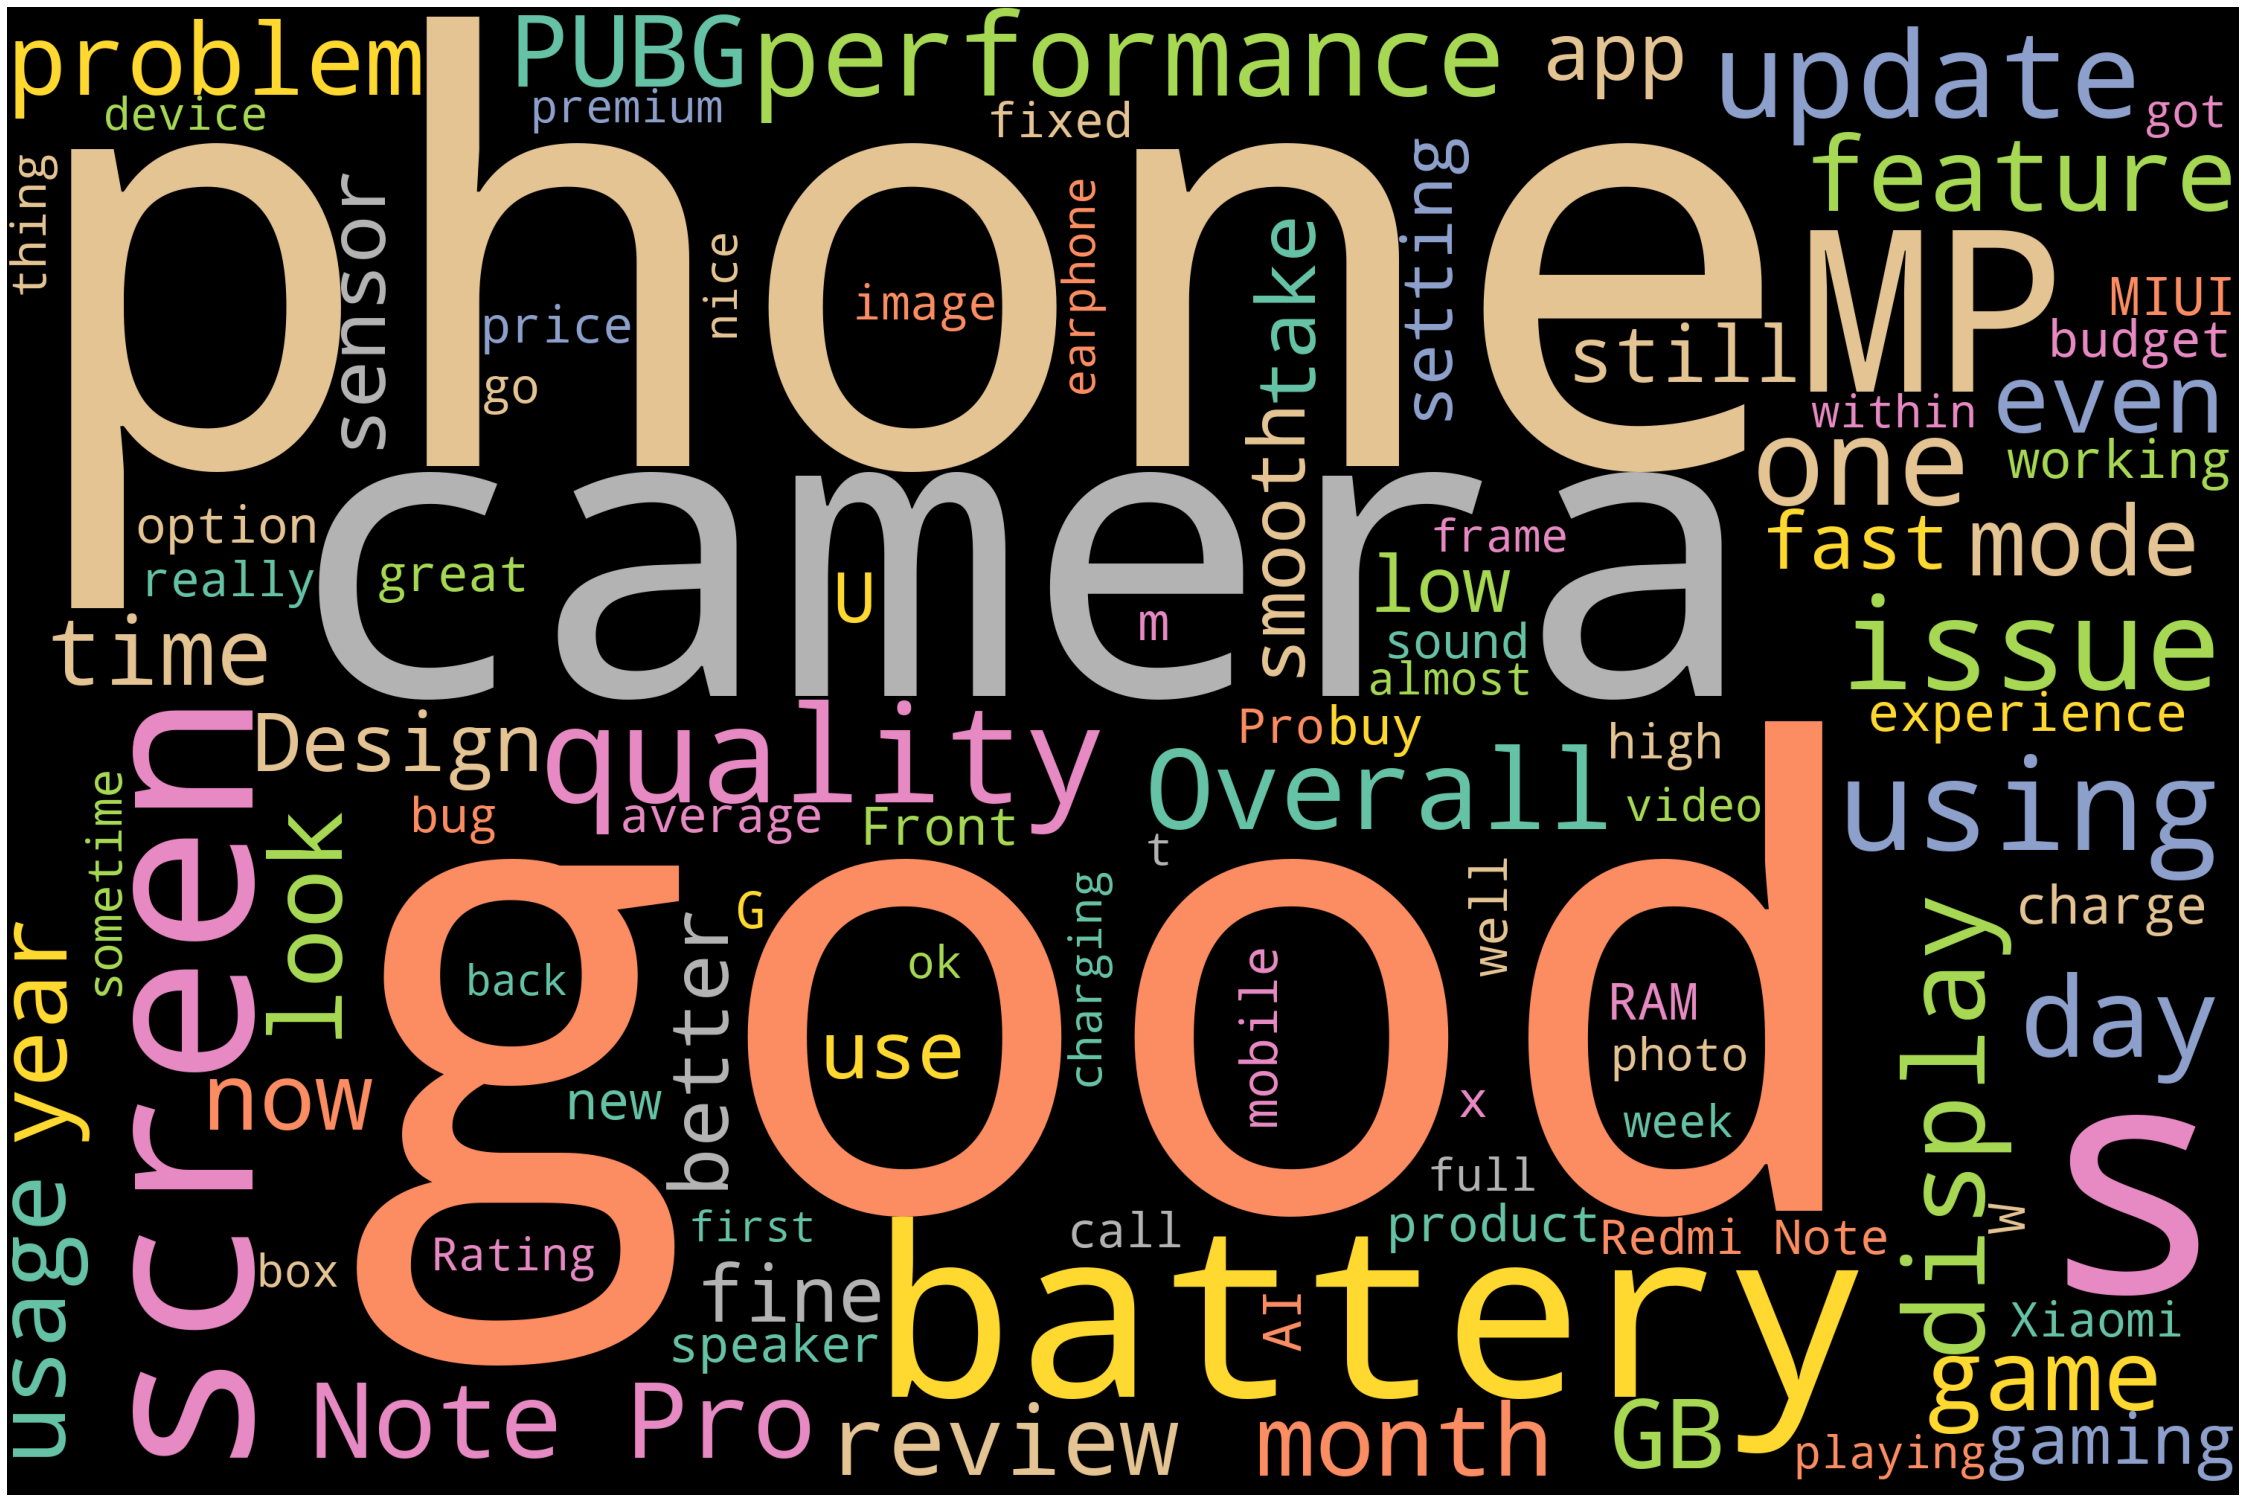

In [28]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# emotional mining

In [29]:
# sentiment analysis using textblob

In [30]:
from textblob import TextBlob

In [31]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [32]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
#Create two new columns ‘Subjectivity’ & ‘Polarity’
mi_copy['Subjectivity'] = mi_copy['comment'].apply(getSubjectivity)
mi_copy['Polarity'] = mi_copy['comment'].apply(getPolarity)

In [34]:
mi_copy

,comment,Subjectivity,Polarity
0,Got the Note Pro in Galcier White Colour on ...,0.461117,0.159148
1,Redmi is famous for its budget smartphones Th...,0.604510,0.368039
2,Over all at this price amazing phone,0.900000,0.600000
3,I am using this model for almost years and...,0.400000,0.325000
4,Hello guys I am using this phone since one mon...,0.419916,0.135384
...,...,...,...
85,Not Bad,0.666667,0.350000
86,It s amazing product,0.900000,0.600000
87,Very good product,0.780000,0.910000
88,Its usage is very good It includes all the bu...,0.640000,0.642500


In [35]:
def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
        return TextBlob(text).apply(getAnalysis)

In [36]:
mi_copy['Analysis'] = mi_copy['Polarity'].apply(getAnalysis )
mi_copy

,comment,Subjectivity,Polarity,Analysis
0,Got the Note Pro in Galcier White Colour on ...,0.461117,0.159148,Positive
1,Redmi is famous for its budget smartphones Th...,0.604510,0.368039,Positive
2,Over all at this price amazing phone,0.900000,0.600000,Positive
3,I am using this model for almost years and...,0.400000,0.325000,Positive
4,Hello guys I am using this phone since one mon...,0.419916,0.135384,Positive
...,...,...,...,...
85,Not Bad,0.666667,0.350000,Positive
86,It s amazing product,0.900000,0.600000,Positive
87,Very good product,0.780000,0.910000,Positive
88,Its usage is very good It includes all the bu...,0.640000,0.642500,Positive


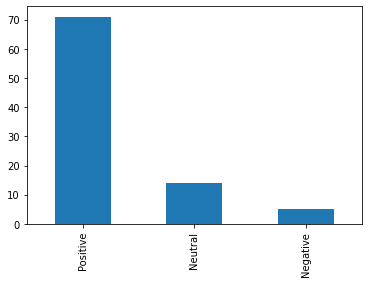

In [37]:
mi_copy['Analysis'].value_counts().plot(kind = 'bar')
# most of the reviews are positive in nature

In [38]:
# Sentiment score of the whole reviews
mi_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Subjectivity,90.0,0.490399,0.271246,0.0000,0.364410,0.531629,0.6,1.0
Polarity,90.0,0.389526,0.341737,-0.3725,0.116051,0.348785,0.7,1.0


In [39]:
# as subjectivity greater 0 suggests the reviews are opinions 

In [40]:
# positive reviews 
mi_copy[mi_copy['Analysis']=='Positive']

,comment,Subjectivity,Polarity,Analysis
0,Got the Note Pro in Galcier White Colour on ...,0.461117,0.159148,Positive
1,Redmi is famous for its budget smartphones Th...,0.604510,0.368039,Positive
2,Over all at this price amazing phone,0.900000,0.600000,Positive
3,I am using this model for almost years and...,0.400000,0.325000,Positive
4,Hello guys I am using this phone since one mon...,0.419916,0.135384,Positive
...,...,...,...,...
85,Not Bad,0.666667,0.350000,Positive
86,It s amazing product,0.900000,0.600000,Positive
87,Very good product,0.780000,0.910000,Positive
88,Its usage is very good It includes all the bu...,0.640000,0.642500,Positive


In [41]:
# negative reviews 
mi_copy[mi_copy['Analysis']=='Negative']

,comment,Subjectivity,Polarity,Analysis
5,Camera quality is not good,0.600000,-0.3500,Negative
14,It has been working well for past years Had...,0.241667,-0.0250,Negative
19,detailing of photo is not much good After usi...,0.300000,-0.1750,Negative
73,Smartphone manufacturers are making joke of Me...,0.745000,-0.3725,Negative
81,The battery life for heavy user is low maxim...,0.400000,-0.1000,Negative


In [42]:
# neutral reviews 
mi_copy[mi_copy['Analysis']=='Neutral']

,comment,Subjectivity,Polarity,Analysis
10,I like it,0.000000,0.0,Neutral
17,All over this phone is trustable,0.000000,0.0,Neutral
23,Awsum,0.000000,0.0,Neutral
30,Lagging when playing PUBG,0.000000,0.0,Neutral
33,Like,0.000000,0.0,Neutral
36,Last one year using no problem,0.066667,0.0,Neutral
46,Valu for money,0.000000,0.0,Neutral
47,Value for money,0.000000,0.0,Neutral
54,Nyc vry nyc,0.000000,0.0,Neutral
55,After one month phone started hanging and s of...,0.500000,0.0,Neutral
